In [138]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits import mplot3d
import math

In [268]:
# p: parametros [m,b], x: datos
# funcion lineal
def f(p,x):
    z=((x[1]-(p[0]*x[0]+p[1]))**2/2*x[2]**2)
    return z

def L(p,x):
    L=0
    for i in range(len(x)):
        L=L-(2*np.pi*x[2,i]**2)+f(p,x)[i]
        

    
    return L
# ----------------------------------------------------------
def prim(m):

    if minm < m and maxm > m:
        return Pm
    else:
        return 0


def prib(b):

    if minb < b and maxb > b:
        return Pb
    else:
        return 0


# ----------------------------------------------------------
def pos(p,x):

    z=(prib(p[1]))*np.exp(L(p,x))*(prim(p[0]))
    
    return z

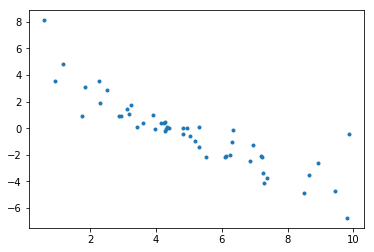

In [141]:
db = np.load('fit_exercise.npy')
plt.plot(db[0],db[1],'.')

In [264]:
# punto de inicio, p=[m,b]
O=[0,0]

# número pasos
s=10000

# guardar los datos
h=np.zeros([s+1,2])
h[0]=O

# ----------------------------------------------------
minm=-2
maxm=0
Pm=1/(maxm-minm)

minb=0
maxb=10
Pb=1/(maxb-minb)

In [265]:

m0=h[0,0]
b0=h[0,1]

# sigma para los datos aleatorios
sig = 1  #deberiasn ser diferentes sigmas para m y b pero en est caso tienen un rango similar

posn_v=np.zeros(s+1)
posv=pos(h[0],db)






In [ ]:
a=[]
b=[]
count=0
count1= 0
for i in range(s):

    m1= (np.random.normal(m0,sig,1))
    b1= (np.random.normal(b0,sig,1))
    
    posn = pos([m1,b1],db)



    h[i+1]=[m1,b1]
    
    posn_v [i]= posn/posv
    
    
    if posn > posv*1:
        
        posv = np.copy(posn)
        m0 = np.copy(m1)
        b0 = np.copy(b1)
        
        count = count+1
        a.append(m0)
        b.append(b0)
        
        
    elif posn_v[i] > np.random.rand():
        posv = np.copy(posn)
        m0 = np.copy(m1)
        b0 = np.copy(b1)
        
        count1 = count1+1
        a.append(m0)
        b.append(b0)
            
            

print(count)
print(count1)
plt.plot(h[:,0],h[:,1],'.')
plt.plot(a,b,'r')
plt.xlabel('m')
plt.ylabel('b')



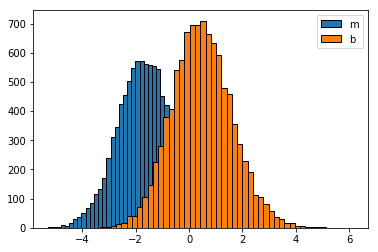

In [273]:
plt.hist(h[:,0],50, edgecolor='black', label='m');
plt.hist(h[:,1],50, edgecolor='black',label='b');
plt.legend()

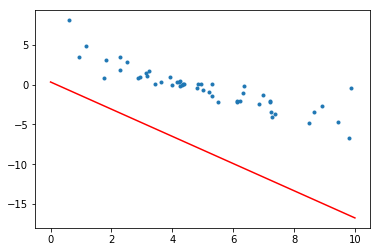

In [274]:
xmin=0
xmax=10
dt=(xmax-xmin)/len(h[:,0])

t=np.arange(xmin,xmax,dt)
y=m0*t+b0

plt.plot(t,y,'r')
plt.plot(db[0],db[1],'.')